<a href="https://colab.research.google.com/github/mingxoxo/open-cv/blob/master/colab_%EC%9B%B9%EC%BA%A0_%EC%9D%B4%EC%9A%A9_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

#파이썬 take_photo 함수 
def take_photo(filename='photo.jpg', quality=0.8):
  #javascript 작성 시작
  js = Javascript('''
    async function takePhoto(quality) {
      
      //div(공간) 생성
      const div = document.createElement('div');

      //button 생성
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      //video 생성
      const video = document.createElement('video');
      //비디오 모양 네모네모
      video.style.display = 'block';
      //카메라(웹캠) 불러오기
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      //div 밑에 child 공간 추가
      document.body.appendChild(div);
      //공간에 video 넣기
      div.appendChild(video);
      //video와 웹캠 연결
      video.srcObject = stream;
      //await -> 비동기식 처리 (thread와 관련)(async와 세트)
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      //canvas 생성
      const canvas = document.createElement('canvas');
      //크기 맞추기
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      //이미지 그리기
      canvas.getContext('2d').drawImage(video, 0, 0);
      //비디오 끄기
      stream.getVideoTracks()[0].stop();
      //div 삭제
      div.remove();
      // 파일 주소 반환
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  #javascript 코드 실행한 결과 반환값을 파이썬에게 전달(대충 그런 의미..)
  data = eval_js('takePhoto({})'.format(quality))
  #웹 브라우저에서 데이터를 저장할때 base64로 저장
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


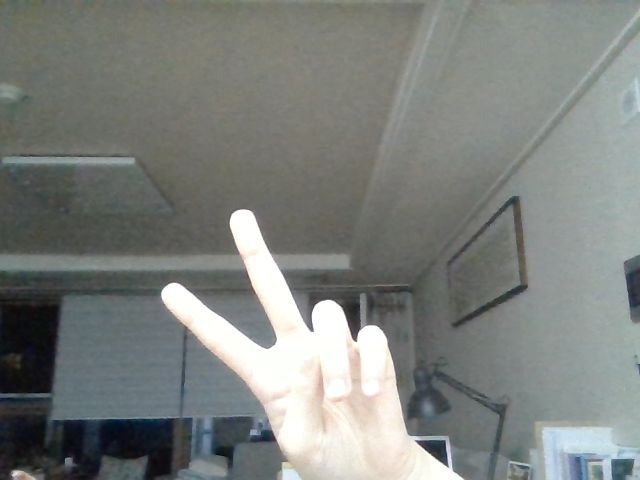

In [7]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))